In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
from scipy import ndimage as ndi
import os 

def show_images(img1, bw = False, img2 = None):
    if img2 is None:
        fig = plt.figure(figsize=(13,13))
        ax = fig.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.imshow(img1,cmap='Greys_r' if bw else None)
        plt.show()
    else :
        plt.figure(figsize=(13,500))
        plt.subplot(1,2,1)
        plt.imshow(img1,cmap='gray')
        plt.title('Scratch Implementation')
        plt.subplot(1,2,2)
        plt.imshow(img2,cmap='gray')
        plt.title('OpenCV Implementation')
        plt.show()

class Scratch:
    def __init__ (self, k=0.05, THRESHOLD_CORNER = 0.001, THRESHOLD_EDGE = 0.0001):
        self.k = k
        #Derivative for calculation currently only sobel
        self.d_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        self.d_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        self.THRESHOLD_CORNER = THRESHOLD_CORNER
        self.THRESHOLD_EDGE = THRESHOLD_EDGE
    

    def corner_harris(self, img, verbose = False): # Verbose to display intermediate steps

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        if verbose:
            print("Gray Scale converted image")
            show_images(gray, bw=True)
        derivative_x = sig.convolve2d(gray, self.d_x, mode='same')
        derivative_y = sig.convolve2d(gray, self.d_y, mode='same')
        if verbose:
            print("Derivative X and Y of image")
            show_images(derivative_x, bw=True)
            show_images(derivative_y, bw=True)
        Ixx = ndi.gaussian_filter(derivative_x**2, sigma=1)
        Ixy = ndi.gaussian_filter(derivative_x*derivative_y, sigma=1)
        Iyy = ndi.gaussian_filter(derivative_y**2, sigma=1)
        if verbose:
            print("Ixx, Ixy, Iyy")
            show_images(Ixx, bw=True)
            show_images(Ixy, bw=True)
            show_images(Iyy, bw=True)
        #harris response calculation
        det = Ixx*Iyy - Ixy**2
        trace = Ixx + Iyy
        harris_response = det - self.k*(trace**2)
        h_max = harris_response.max() 
        h_min = harris_response.min()
        if verbose:
            print(f'Min = {h_min} and Max = {h_max}')
        harris_response_range = harris_response.max() - harris_response.min()
        scaled_response = (harris_response/ harris_response_range)*255
        if verbose:
            print("Scaled Harris Response")
            show_images(scaled_response, True)
        
        corners = np.copy(img)
        edges = np.copy(img)
        for y, row in enumerate(harris_response):
            for x, value in enumerate(row):
                if value >= self.THRESHOLD_CORNER*h_max:
                    # cv2.circle(corners, (x,y), 1, (0,255,0), 1)
                    corners[y,x] = [255,0,0]   # corners RED
                elif value <= self.THRESHOLD_EDGE*h_min:
                    edges[y,x] = [0,255,0] # edges GREEN

        
        if verbose:
            print("CORNERS")
            show_images(corners)
            print("EDGES")
            show_images(edges)
        return corners

In [4]:
def open_cv_harris(img, k=0.05, THRESHOLD_CORNER = 0.001, THRESHOLD_EDGE = 0.0001):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_float = np.float32(gray)
    corner_harris = cv2.cornerHarris(src=gray_float,blockSize=2, ksize=3, k=0.05)
    corner_harris = cv2.dilate(corner_harris, None) #  to increase the dot size
    img[corner_harris>0.01*corner_harris.max()]=[255,0,0]
    return img

# For Single Image

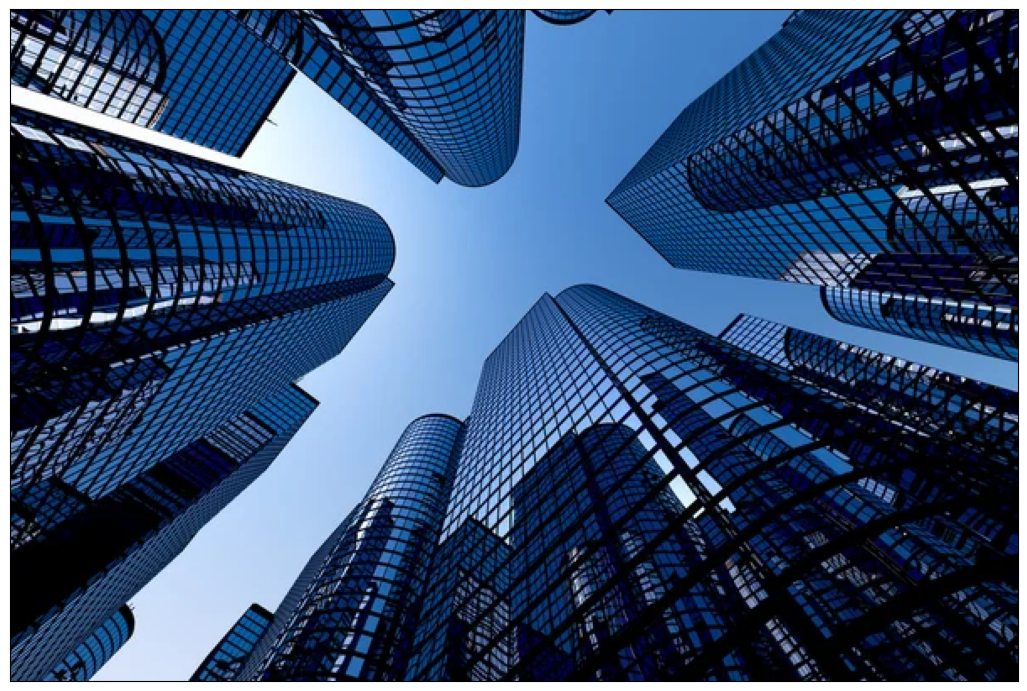

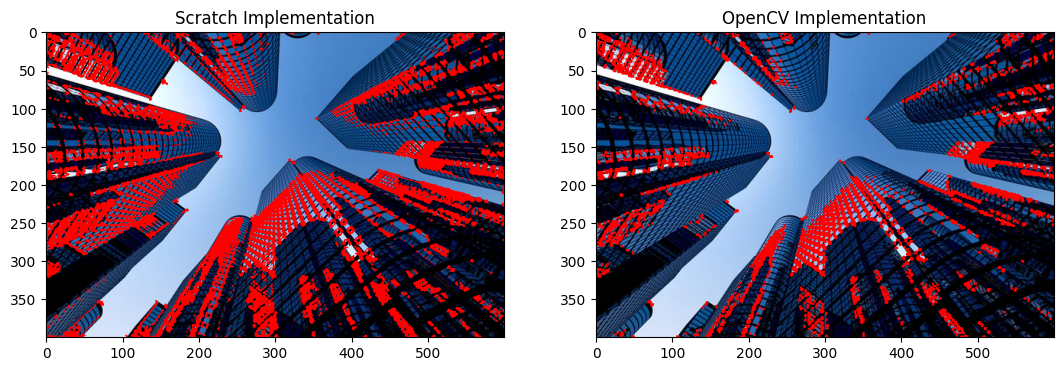

In [5]:
path = 'Images/Question 1/8.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_images(img)
scratch = Scratch()
img1 = scratch.corner_harris(img, verbose=False)
img2 = open_cv_harris(img)
show_images(img1 = img1, img2=img2)

# For complete folder

In [6]:
def get_image_paths(images_dir):

  image_paths = []
  for filename in os.listdir(images_dir):
    # Check for valid image extensions (case-insensitive)
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
      full_path = os.path.join(images_dir, filename)
      image_paths.append(full_path)

  return image_paths

images_dir = 'Images/Question 1'
images = get_image_paths(images_dir)
print(f"Total images found in the directory : {len(images)}")

Total images found in the directory : 10


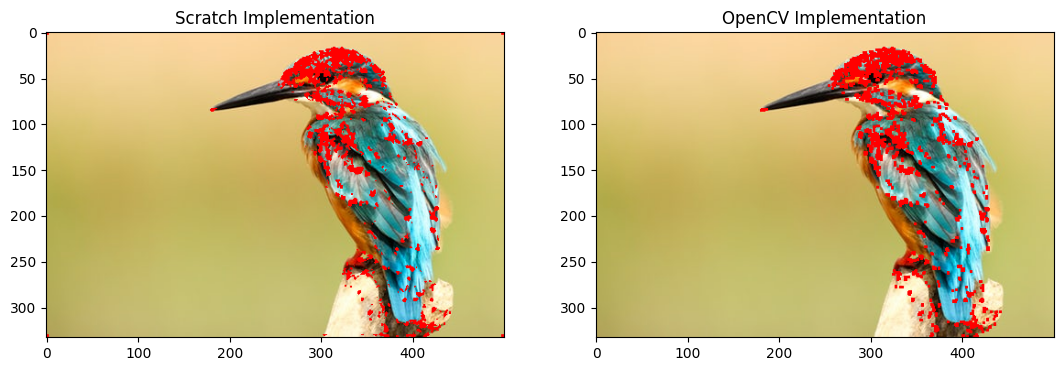

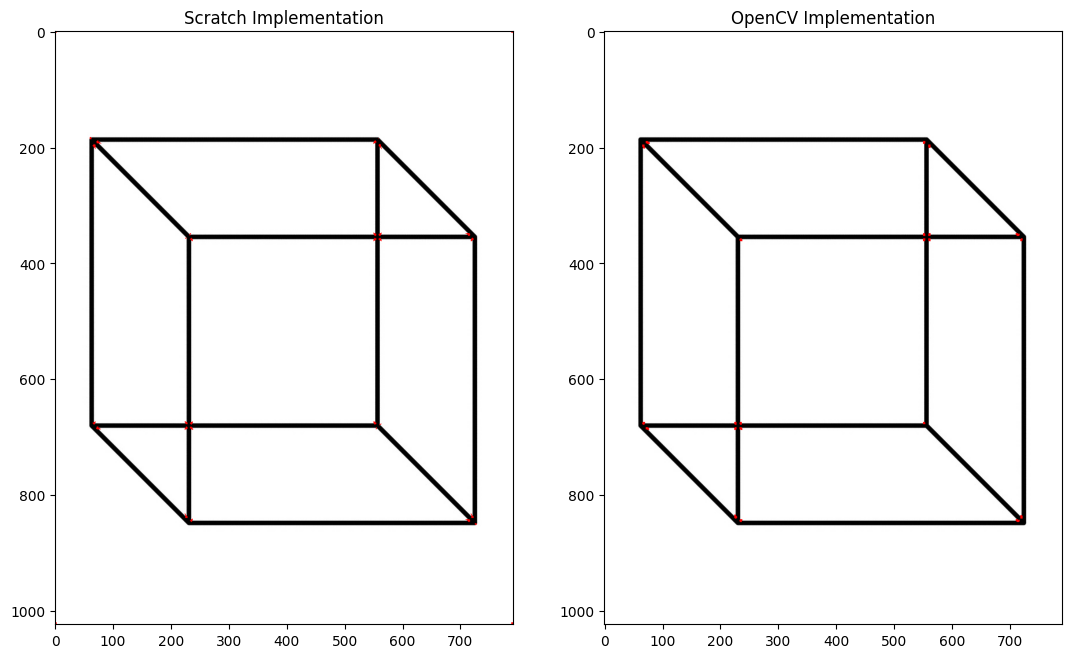

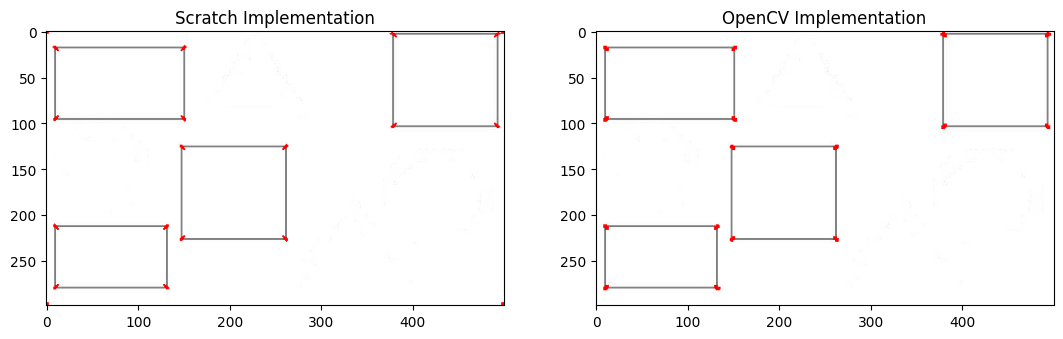

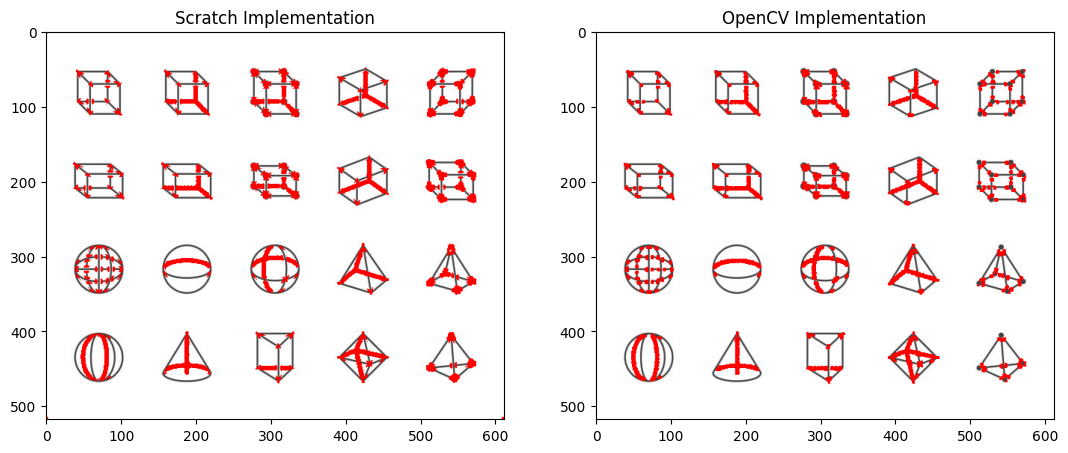

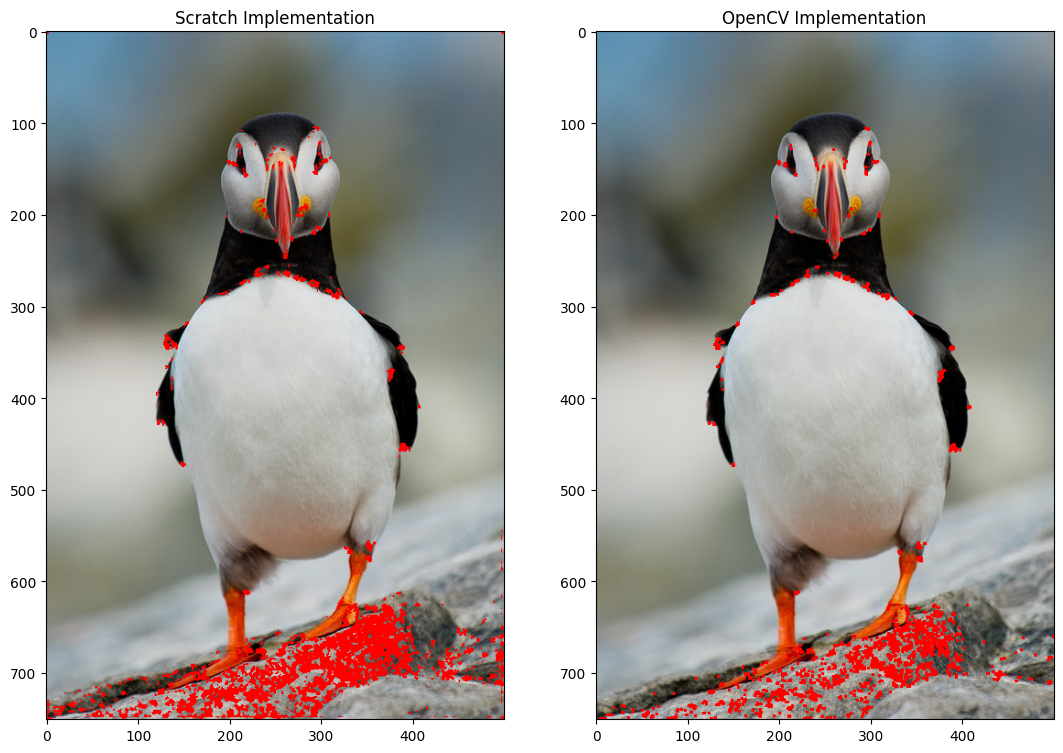

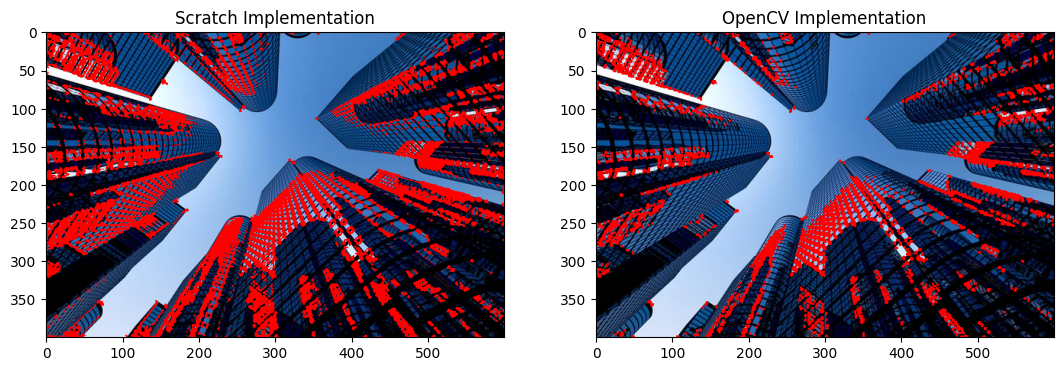

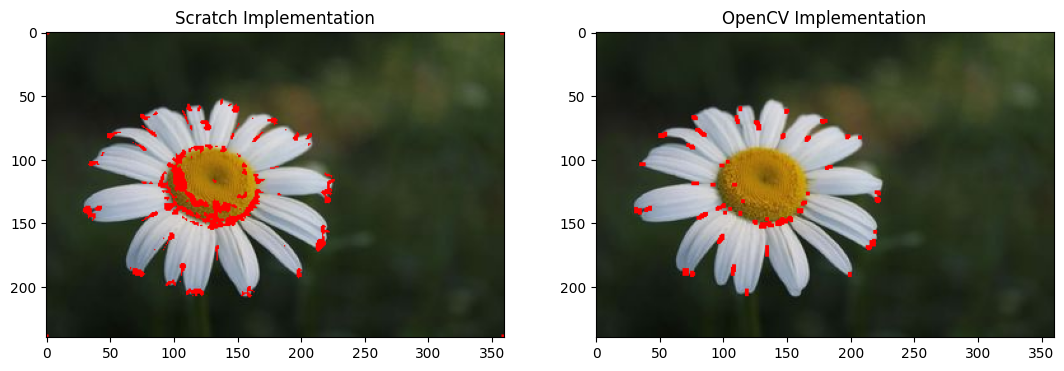

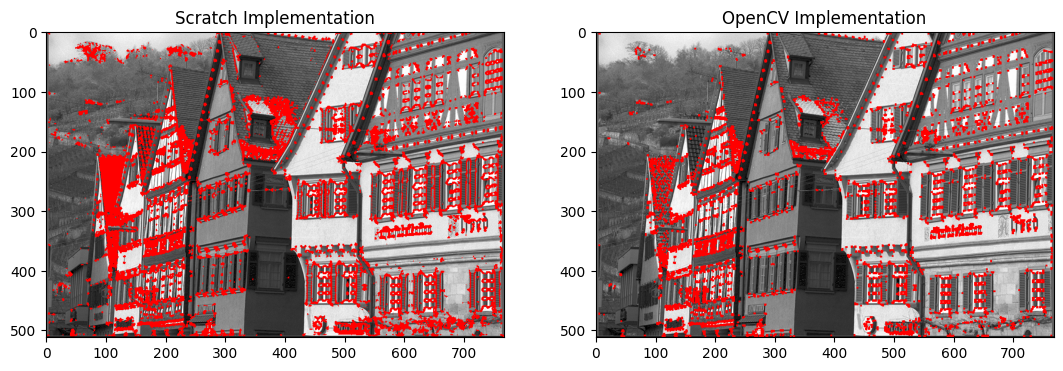

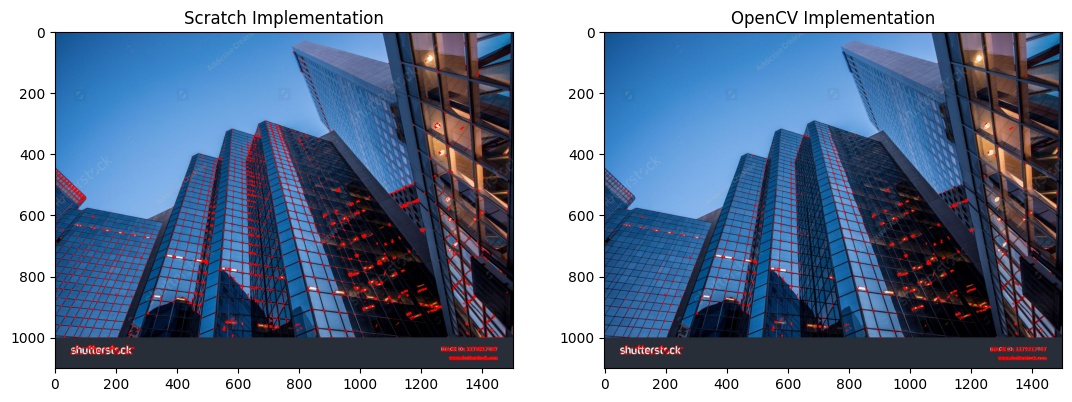

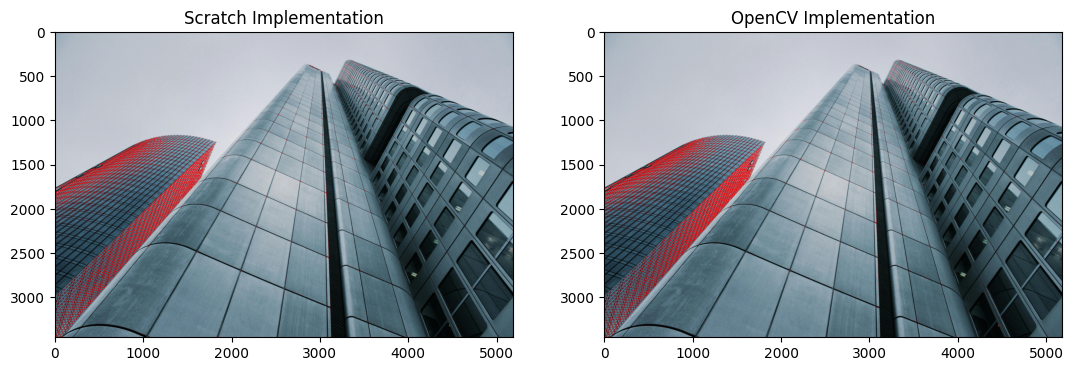

In [7]:
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # show_images(img)    # Uncomment this to display the input image if you want 
    scratch = Scratch()
    img1 = scratch.corner_harris(img, verbose=False)
    img2 = open_cv_harris(img)
    show_images(img1 = img1, img2=img2)